In [1]:
#!/usr/bin/env python

##################################################################################################################
# visualize_combination(truck_translation,\                                                                      #
#                       truck_rotation,\                                                                         #
#                       first_trailer_rotation,\                                                                 #
#                       second_trailer_rotation,\                                                                #
#                       steering_percentage,\                                                                    #
#                       destination_translation,\                                                                #
#                       destination_rotation,\                                                                   #
#                       number_second_trailers)                                                                  #
#                                                                                                                #
# This method is used to plot the combination consisting of a truck and possible second_trailers                 #
# Inputs: truck_translation       absolute translation of the truck                                              #
#         truck_rotation          absolute rotation of the truck, value in degrees                               #
#         first_trailer_rotation  relative rotation of the first trailer to the truck, value in degrees          #
#         second_trailer_rotation relative rotation of the second trailer to the first trailer, value in degrees #
#         steering_percentage     steering angle of the truck, value between -1 and 1                            #
#         destination_translation absolute translation of the destination                                        #
#         destination_rotation    absolute rotation of the destination, value in degrees                         #
#         number_trailers         number of trailers, value between 0 and 2                                      #
# Outputs: _                                                                                                     #
##################################################################################################################

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import transforms
import numpy as np
from numpy import array
%matplotlib inline

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

def visualize_combination(visualisation_element):
    
    truck_translation,\
    truck_rotation,\
    first_trailer_rotation,\
    second_trailer_rotation,\
    steering_percentage,\
    destination_translation,\
    destination_rotation,\
    number_second_trailers = visualisation_element
    
    # Shape of the yard
    yard_shape = array([30,10])
    # Shape of the destination, here chosen equals to the shape of the second trailer
    destination_shape = array([9,2])
    
    # Shape of some truck, first and second trailer items
    drive_wheel_shape = array([0.8,0.6])
    hitch_radius = 0.1
    
    # Truck item numbers
    # 0: truck
    # 1: cab
    # 2: hitch
    # 3: wheel middle right
    # 4: wheel middle left
    # 5: wheel back right
    # 6: wheel back left
    # 7: wheel front right
    # 8: wheel front left
    
    item_translations_truck = array([
        [0,0],
        [3.75,0],
        [-1.5,0],
        [0,-0.7],
        [0,0.7],
        [-1,-0.8],
        [-1,0.8],
        [3.5,-0.8],
        [3.5,0.8]])
    
    # Shape of the truck items
    truck_shape = array([7,2])
    cab_shape = array([1.5,2])
    wheel_shape = array([0.8,0.4])
    
    # The rotation center of a vehicle lies between the unsteered wheels
    rotation_center_truck = array([2.5,1])
    # This list defines, if and how fast a item rotates relatively, depending on the steering angle
    item_steering_rotations_truck = array([0,0,0,0,0,-0.6,-0.6,1,1])
    # Translation of the hitch relative to the rotation center
    hitch_translation_truck = -1.5
    
    maximal_steering_angle = 60
    
    if number_second_trailers == 1:
        
        # First trailer item numbers
        # 0: chassis
        # 1: shaft
        # 2: wheel back right
        # 3: wheel back left
        # 4: wheel front right
        # 5: wheel front left
        
        item_translations_first_trailer = array([
            [0,0],
            [4,0],
            [-1,-0.8],
            [-1,0.8],
            [0,-0.8],
            [0,0.8]])
        
        # Shape of the first trailer items
        first_trailer_shape = array([5.5,2])
        shaft_shape = array([2,0.2])
        
        # The rotation center of a vehicle lies between the unsteered wheels
        rotation_center_first_trailer = array([2.5,1])
        # This list defines, if and how fast a item rotates relatively, depending on the relative rotation 
        item_steering_rotations_first_trailer = array([0,0,-0.3,-0.3,0,0])
        # Translation of the hitch relative to the rotation center
        hitch_translation_first_trailer_truck = 5
        
    if number_second_trailers == 2:
        
        # First trailer item numbers
        # 0: chassis
        # 1: shaft
        # 2: hitch
        # 3: wheel back right
        # 4: wheel back left
        # 5: wheel front right
        # 6: wheel front left
        
        item_translations_first_trailer = array([
            [0,0],
            [1.5,0],
            [-0.5,0],
            [-1,-0.8],
            [-1,0.8],
            [0,-0.8],
            [0,0.8]])
        
        # Shape of the first trailer items
        first_trailer_shape = array([2,2])
        shaft_shape = array([2,0.2])
        
        # The rotation center of a vehicle lies between the unsteered wheels
        rotation_center_first_trailer = array([1.5,1])
        # This list defines, if and how fast a item rotates relatively, depending on the relative rotation
        item_steering_rotations_first_trailer = array([0,0,0,-0.4,-0.4,0,0])
        # Translation of the hitchs relative to the rotation center
        hitch_translation_first_trailer_truck = 2.5
        hitch_translation_first_trailer_second_trailer = -0.5
        
        # Second trailer item numbers
        # 0: chassis
        # 1: shaft
        # 2: wheel back right
        # 3: wheel back left
        # 4: wheel front right
        # 5: wheel front left
        
        item_translations_second_trailer = array([
            [0,0],
            [-1,-0.8],
            [-1,0.8],
            [0,-0.8],
            [0,0.8],
            [1,-0.8],
            [1,0.8]])
        
        # Shape of the first trailer items
        second_trailer_shape = array([9,2])
        
        # The rotation center of a vehicle lies between the unsteered wheels
        rotation_center_second_trailer = array([2.5,1])
        # This list defines, if and how fast a item rotates relatively, depending on the relative rotation
        item_steering_rotations_second_trailer = array([0,-0.2,-0.2,0,0,0.2,0.2])
        # Translation of the hitch relative to the rotation center
        hitch_translation_second_trailer = 5.5
    
############################################################################################################################
    
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111, aspect='equal')
    
    # Hiding the axes
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    
    ## Destination plotting
    destination_rectangle = patches.Rectangle(-destination_shape/2,\
                                              destination_shape[0],\
                                              destination_shape[1],\
                                              color="red",\
                                              alpha=0.50)
    rotation_destination = transforms.Affine2D().rotate_deg(destination_rotation)
    translation_destination = transforms.Affine2D().translate(destination_translation[0],\
                                                              destination_translation[1])
    destination_transformation = rotation_destination\
                                 +translation_destination\
                                 +ax1.transData
    destination_rectangle.set_transform(destination_transformation)
    ax1.add_patch(destination_rectangle)
    
    ## Truck plotting
    wheel_rectangles = []
    everything = []
    truck_rectangle = patches.Rectangle(-rotation_center_truck,\
                                        truck_shape[0],\
                                        truck_shape[1],\
                                        color="black",\
                                        alpha=0.50)
    cab_rectangle = patches.Rectangle(-cab_shape/2,\
                                      cab_shape[0],\
                                      cab_shape[1],\
                                      color="green",\
                                      alpha=0.50)
    drive_wheel_rectangles = [patches.Rectangle(-drive_wheel_shape/2,\
                                          drive_wheel_shape[0],\
                                          drive_wheel_shape[1],\
                                          color="black",\
                                          alpha=0.50)\
                                          for drive_wheel_number in range(2)]
    wheel_rectangles = [patches.Rectangle(-wheel_shape/2,\
                                          wheel_shape[0],\
                                          wheel_shape[1],\
                                          color="black",\
                                          alpha=0.50)\
                                          for wheel_number in range(5)]
    hitch_circle = patches.Circle((0, 0),\
                                  hitch_radius,\
                                  color="black",\
                                  alpha=0.50)
    everything = [truck_rectangle]+[cab_rectangle]+[hitch_circle]+drive_wheel_rectangles+wheel_rectangles
    
    item_number = 0
    item_rotation = []
    item_translation = []
    for item_number in range(len(everything)-1):
        # rotate wheels
        item_rotation = item_rotation\
                        +[transforms.Affine2D().rotate_deg(steering_percentage\
                                                           *maximal_steering_angle\
                                                           *item_steering_rotations_truck[item_number])]
        # translate wheels
        item_translation = item_translation\
                           +[transforms.Affine2D().translate(item_translations_truck[item_number,0],\
                                                             item_translations_truck[item_number,1])]
    # rotate truck with wheels
    rotation_everything = transforms.Affine2D().rotate_deg(truck_rotation)
    # translate truck with wheels
    translation_everything = transforms.Affine2D().translate(truck_translation[0],\
                                                             truck_translation[1])
    
    for item_number in range(len(everything)-1):
        item_transformation = item_rotation[item_number]\
                              +item_translation[item_number]\
                              +rotation_everything\
                              +translation_everything\
                              +ax1.transData
        everything[item_number].set_transform(item_transformation)
        ax1.add_patch(everything[item_number])
    
    ## first_trailer plotting
    if number_second_trailers != 0:
        wheel_rectangles = []
        everything = []
        first_trailer_rectangle = patches.Rectangle(-rotation_center_first_trailer,\
                                            first_trailer_shape[0],\
                                            first_trailer_shape[1],\
                                            color="black",\
                                            alpha=0.50)
        shaft_rectangle = patches.Rectangle(-shaft_shape/2,\
                                            shaft_shape[0],\
                                            shaft_shape[1],\
                                            color="black",\
                                            alpha=0.50)
        wheel_rectangles = [patches.Rectangle(-wheel_shape/2,\
                                              wheel_shape[0],\
                                              wheel_shape[1],\
                                              color="black",\
                                              alpha=0.50)\
                                              for wheel_number in range(5)]
     
        if number_second_trailers == 1:
            everything = [first_trailer_rectangle]+[shaft_rectangle]+wheel_rectangles
         
        if number_second_trailers == 2:
            hitch_circle = patches.Circle((0, 0),\
                                          hitch_radius,\
                                          color="black",\
                                          alpha=0.50)
            everything = [first_trailer_rectangle]+[shaft_rectangle]+[hitch_circle]+wheel_rectangles
        
        item_number = 0
        item_rotation = []
        item_translation = []
        for item_number in range(len(everything)-1):
            # rotate wheels
            item_rotation = item_rotation\
                            +[transforms.Affine2D().rotate_deg(-first_trailer_rotation\
                                                               *item_steering_rotations_first_trailer[item_number])]
            # translate wheels
            item_translation = item_translation\
                               +[transforms.Affine2D().translate(item_translations_first_trailer[item_number,0],\
                                                                 item_translations_first_trailer[item_number,1])]
        # rotate first_trailer with wheels
        rotation_everything = transforms.Affine2D().rotate_deg(truck_rotation\
                                                               +first_trailer_rotation)
        # translate first_trailer with wheels
        translation_everything = transforms.Affine2D().translate(truck_translation[0]\
                                                                 +hitch_translation_truck\
                                                                 *np.cos(np.deg2rad(truck_rotation))\
                                                                 -hitch_translation_first_trailer_truck\
                                                                 *np.cos(np.deg2rad(truck_rotation+first_trailer_rotation)),\
                                                                 truck_translation[1]\
                                                                 +hitch_translation_truck\
                                                                 *np.sin(np.deg2rad(truck_rotation))\
                                                                 -hitch_translation_first_trailer_truck\
                                                                 *np.sin(np.deg2rad(truck_rotation+first_trailer_rotation)))
        
        for item_number in range(len(everything)-1):
            item_transformation = item_rotation[item_number]\
                                  +item_translation[item_number]\
                                  +rotation_everything\
                                  +translation_everything\
                                  +ax1.transData
            everything[item_number].set_transform(item_transformation)
            ax1.add_patch(everything[item_number])
           
    ## second_trailer plotting    
    if number_second_trailers == 2:
        wheel_rectangles = []
        everything = []
        second_trailer_rectangle = patches.Rectangle(-rotation_center_second_trailer,\
                                              second_trailer_shape[0],\
                                              second_trailer_shape[1],\
                                              color="black",\
                                              alpha=0.50)
        wheel_rectangles = [patches.Rectangle(-wheel_shape/2,\
                                              wheel_shape[0],\
                                              wheel_shape[1],\
                                              color="black",\
                                              alpha=0.50)\
                                              for wheel_number in range(7)]
        everything = [second_trailer_rectangle]+wheel_rectangles
        
        item_number = 0
        item_rotation = []
        item_translation = []
        for item_number in range(len(everything)-1):
            # rotate wheels
            item_rotation = item_rotation\
                            +[transforms.Affine2D().rotate_deg(-second_trailer_rotation\
                                                               *item_steering_rotations_second_trailer[item_number])]
            # translate wheels
            item_translation = item_translation\
                               +[transforms.Affine2D().translate(item_translations_second_trailer[item_number,0],\
                                                                 item_translations_second_trailer[item_number,1])]
        # rotate second_trailer with wheels
        rotation_everything = transforms.Affine2D().rotate_deg(truck_rotation\
                                                               +first_trailer_rotation\
                                                               +second_trailer_rotation)
        # translate second_trailer with wheels
        translation_everything = transforms.Affine2D().translate(truck_translation[0]\
                                                                 +hitch_translation_truck\
                                                                 *np.cos(np.deg2rad(truck_rotation))\
                                                                 +(-hitch_translation_first_trailer_truck+hitch_translation_first_trailer_second_trailer)\
                                                                 *np.cos(np.deg2rad(truck_rotation+first_trailer_rotation))\
                                                                 -hitch_translation_second_trailer\
                                                                 *np.cos(np.deg2rad(truck_rotation+first_trailer_rotation+second_trailer_rotation)),\
                                                                 truck_translation[1]\
                                                                 +hitch_translation_truck\
                                                                 *np.sin(np.deg2rad(truck_rotation))\
                                                                 +(-hitch_translation_first_trailer_truck+hitch_translation_first_trailer_second_trailer)\
                                                                 *np.sin(np.deg2rad(truck_rotation+first_trailer_rotation))\
                                                                 -hitch_translation_second_trailer\
                                                                 *np.sin(np.deg2rad(truck_rotation+first_trailer_rotation+second_trailer_rotation)))
        
        for item_number in range(len(everything)-1):
            item_transformation = item_rotation[item_number]\
                                  +item_translation[item_number]\
                                  +rotation_everything\
                                  +translation_everything\
                                  +ax1.transData
            everything[item_number].set_transform(item_transformation)
            ax1.add_patch(everything[item_number])
    
    plt.xlim(0, yard_shape[0])
    plt.ylim(0, yard_shape[1])
    plt.show()

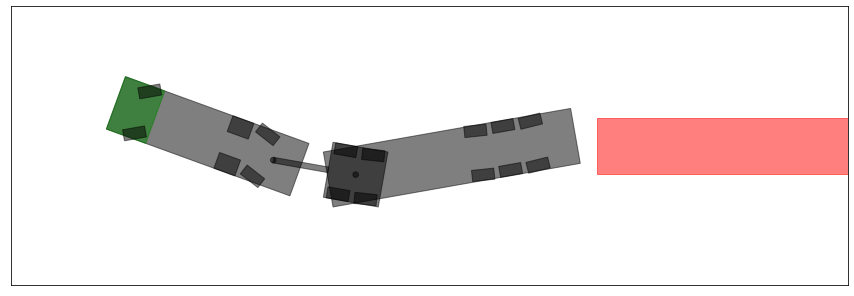

In [2]:
# Just a first exemplary test visualization

truck_translation = array([8,5])
truck_rotation = 160
first_trailer_rotation = 10
second_trailer_rotation = 20
steering_percentage = 0.5
destination_translation = array([25.5,5])
destination_rotation = 180
number_second_trailers = 2

############################################################################################################################

visualisation_element = [truck_translation,\
                         truck_rotation,\
                         first_trailer_rotation,\
                         second_trailer_rotation,\
                         steering_percentage,\
                         destination_translation,\
                         destination_rotation,\
                         number_second_trailers]

visualize_combination(visualisation_element)

In [3]:
#!/usr/bin/env python

########################################################################################
# vector_rotation(vector,angle)                                                        #
#                                                                                      #
# This method is used to rotate a two dimensional vector around its origin by an angle #                
# Inputs: vector two dimensional vector                                                #
#         angle  angle, value in degrees                                               #
# Outputs: vector rotated two dimensional vector                                       #
########################################################################################

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

import numpy as np
from numpy import array

def vector_rotation(vector,angle):
    rotation_matrix = array([[np.cos(np.deg2rad(angle)),-np.sin(np.deg2rad(angle))],
                             [np.sin(np.deg2rad(angle)),np.cos(np.deg2rad(angle))]])
    vector = np.dot(rotation_matrix,vector)
    return vector

In [4]:
#!/usr/bin/env python

#############################################################################################################################
# constant_rotation(constant,angle)                                                                                         #
#                                                                                                                           #
# This method is used to rotate a two dimensional vector with constant x value and no y value around its origin by an angle #                
# Inputs: constant x value of the rotated vector                                                                            #
#         angle    angle, value in degrees                                                                                  #
# Outputs: vector rotated two dimensional vector                                                                            #
#############################################################################################################################

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

import numpy as np
from numpy import array

def constant_rotation(constant,angle):
    rotation_vector = array([np.cos(np.deg2rad(angle)),\
                             np.sin(np.deg2rad(angle))])
    vector = rotation_vector*constant
    return vector

In [5]:
#!/usr/bin/env python

################################################################################################################
# endpoint_movement(vector,angle)                                                                              #
#                                                                                                              #
# This method is used to measure the relative movement of the endpoint of a vector during rotation by an angle #                
# Inputs: vector two dimensional vector                                                                        #
#         angle  angle, value in degrees                                                                       #
# Outputs: movement relative movement of the endpoint of the vector                                            #
################################################################################################################

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

import numpy as np

def endpoint_movement(vector,angle):
    movement = vector_rotation(vector,angle)-vector
    return movement

In [16]:
#!/usr/bin/env python

###########################################################################
# angle_two_vectors(vector1,vector2)                                      #  
#                                                                         #
# This method is used to measure the relative angle between two vectors   #
# It can handle vectors of length zero, despite that makes no sense       #
# Inputs: vector1 two dimensional vector                                  #
#         vector2 two dimensional vector                                  #
# Outputs: angle relative angle between the two vectors, value in degrees #
###########################################################################

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

import numpy as np
from numpy.linalg import norm

def angle_two_vectors(vector1,vector2):
    if norm(vector1)*norm(vector1) != 0:
        angle = np.rad2deg(np.arccos(np.dot(vector1,vector2)/(norm(vector1)*norm(vector2))))
    else:
        angle = 0
    return angle

In [25]:
#!/usr/bin/env python

###################################################################################################################
# Simulate_combination()                                                                                          #  
#                                                                                                                 #
# This class initialises the simulation of of a truck with a variable number of trailers                          #                
# Inputs: destination_translation absolute translation of the destination                                         #
#         destination_rotation    absolute rotation of the destination, value in degrees                          #
# Outputs: _                                                                                                      #
# Methods: run(velocity,steering_percentage)                                                                      #
#                                                                                                                 #
# run(velocity,steering_percentage)                                                                               #
# This method is used to simulate the movement of a truck with a variable number of trailers                      #
# Inputs: destination_translation absolute translation of the destination                                         #
#         steering_percentage     steering angle of the truck, value between -1 and 1                             #
# Outputs: truck_translation       absolute translation of the truck                                              #
#          truck_rotation          absolute rotation of the truck, value in degrees                               #
#          first_trailer_rotation  relative rotation of the first trailer to the truck, value in degrees          #
#          second_trailer_rotation relative rotation of the second trailer to the first trailer, value in degrees #
###################################################################################################################

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

import numpy as np
from numpy import array

class Simulate_combination():
    def __init__(self,destination_translation,destination_rotation):
        
        self.truck_translation = array([np.float(18),np.float(5)])
        self.truck_rotation = 0
        self.first_trailer_rotation = 0
        self.second_trailer_rotation = 0
        
        self.wheelbase_truck = 3.5
        self.maximal_steering_angle = 60
        self.hitch_translation_truck = -1.5
        self.hitch_translation_first_trailer_truck = 2.5
        self.hitch_translation_first_trailer_second_trailer = -0.5
        self.hitch_translation_second_trailer = 5.5
        
        self.step_size = 1e-2
        self.plotting_interval = 1e2
        
        self.step_number = 1
               
        self.destination_rotation = destination_rotation
        self.destination_translation = destination_translation
        
        self.number_second_trailers = 2
        
    def run(self,velocity,steering_percentage,visualisation_queue):
        steering_angle = steering_percentage*self.maximal_steering_angle
        distance = velocity*self.step_size
        
        truck_movement = constant_rotation(distance,self.truck_rotation)
        first_trailer_movement = vector_rotation(truck_movement,self.first_trailer_rotation)
        second_trailer_movement = vector_rotation(first_trailer_movement,self.second_trailer_rotation)
        
        hitch_vector_truck = constant_rotation(self.hitch_translation_truck,\
                                               self.truck_rotation)
        hitch_vector_first_trailer_truck = constant_rotation(self.hitch_translation_first_trailer_truck,\
                                                     self.truck_rotation+\
                                                     self.first_trailer_rotation)
        hitch_vector_first_trailer_second_trailer = constant_rotation(self.hitch_translation_first_trailer_second_trailer,\
                                                       self.truck_rotation+\
                                                       self.first_trailer_rotation)
        hitch_vector_second_trailer = constant_rotation(self.hitch_translation_second_trailer,\
                                                 self.truck_rotation+\
                                                 self.first_trailer_rotation+\
                                                 self.second_trailer_rotation)
        
        if norm(truck_movement) != 0:
            
            old_truck_rotation = self.truck_rotation
            
            rotation_truck = 0      
            ## Truck movement
            if steering_percentage != 0:
                lock = self.wheelbase_truck/np.tan(np.deg2rad(steering_angle))
                rotation_truck = np.rad2deg(np.arcsin(distance/lock))/2
            self.truck_rotation += rotation_truck
            
            translation_truck = vector_rotation(truck_movement,rotation_truck)
            self.truck_translation += translation_truck
          
            step_rotation_truck = self.truck_rotation-old_truck_rotation
            old_first_trailer_rotation = self.first_trailer_rotation
            
            if self.number_second_trailers >= 1:
            
                ## first_trailer movement
                truck_hitch_movement = truck_movement\
                                       +endpoint_movement(hitch_vector_truck,\
                                                          step_rotation_truck)
                
                first_trailer_movement = vector_rotation(truck_movement,self.first_trailer_rotation)
                
                rotation_first_trailer = np.sign(self.first_trailer_rotation)\
                                         *angle_two_vectors(hitch_vector_first_trailer_truck\
                                         -first_trailer_movement\
                                         +truck_hitch_movement,\
                                         np.sign(distance)*truck_movement)
                self.first_trailer_rotation = -step_rotation_truck+rotation_first_trailer
                
                step_rotation_first_trailer = self.first_trailer_rotation-old_first_trailer_rotation
                
            if self.number_second_trailers == 2:    
                
                ## second_trailer movement
                first_trailer_hitch_movement = first_trailer_movement\
                                       +endpoint_movement(hitch_vector_first_trailer_second_trailer,\
                                                          step_rotation_first_trailer)
                
                second_trailer_movement = vector_rotation(first_trailer_movement,self.second_trailer_rotation)
                
                rotation_second_trailer = np.sign(self.second_trailer_rotation)\
                                           *angle_two_vectors(hitch_vector_second_trailer\
                                           -second_trailer_movement\
                                           +first_trailer_hitch_movement,\
                                           np.sign(distance)*first_trailer_movement)
                self.second_trailer_rotation = -step_rotation_truck-step_rotation_first_trailer+rotation_second_trailer
                
        if np.mod(self.step_number,self.plotting_interval) == 0:
            self.step_number = 1
            visualisation_queue.put([self.truck_translation,\
                                     self.truck_rotation,\
                                     self.first_trailer_rotation,\
                                     self.second_trailer_rotation,\
                                     steering_percentage,\
                                     self.destination_translation,\
                                     self.destination_rotation,\
                                     self.number_second_trailers])
        else:
            self.step_number += 1
            
        return self.truck_translation,self.truck_rotation,self.first_trailer_rotation,self.second_trailer_rotation,visualisation_queue

Visualisation...


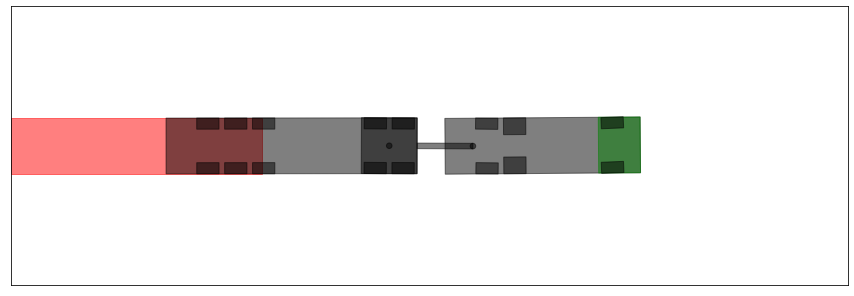

Visualisation...


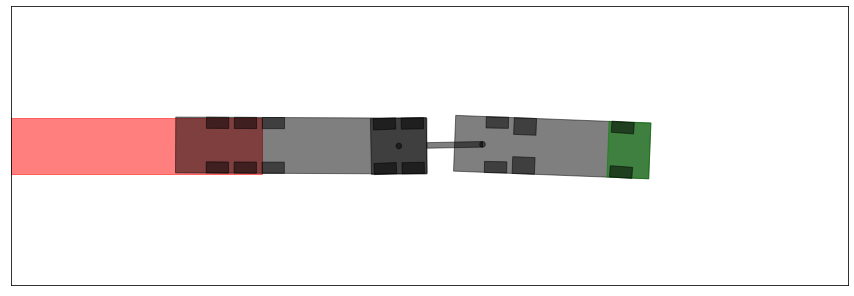

Visualisation...


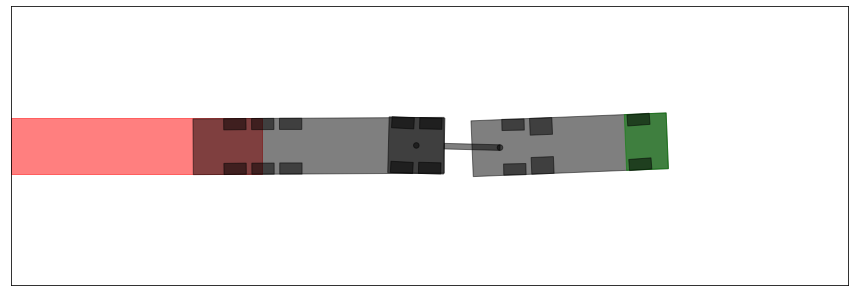

Visualisation...


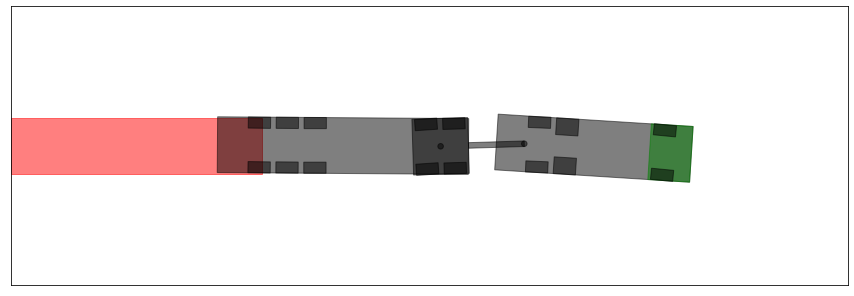

Visualisation...


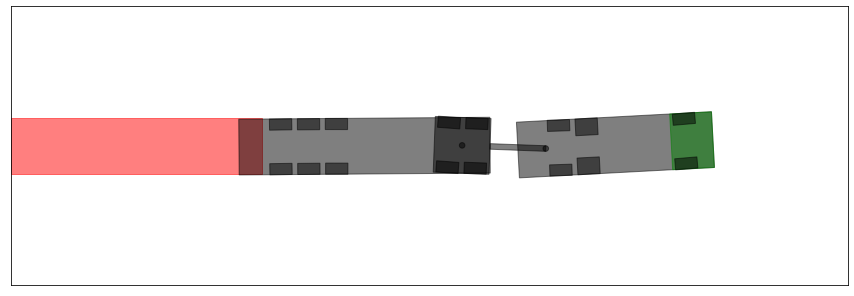

Visualisation...


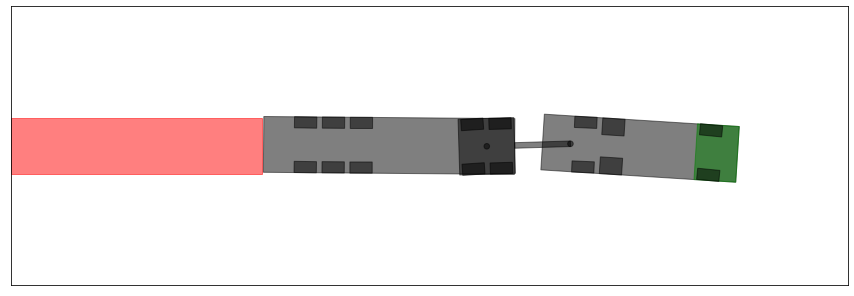

Visualisation...


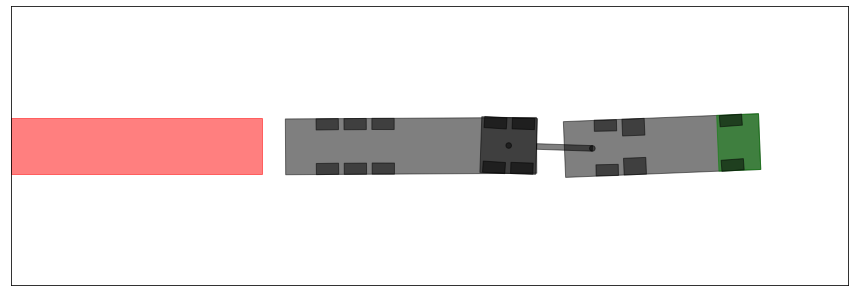

Visualisation...


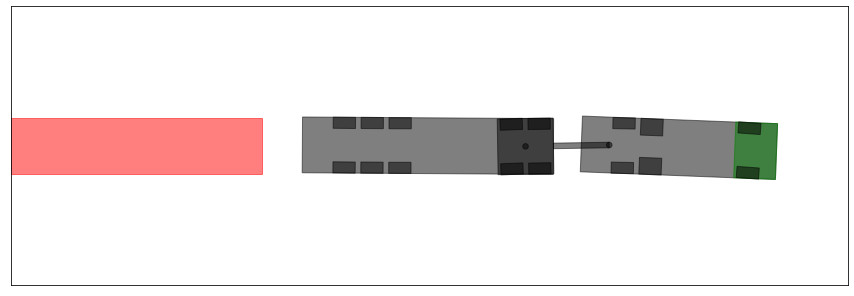

Visualisation...


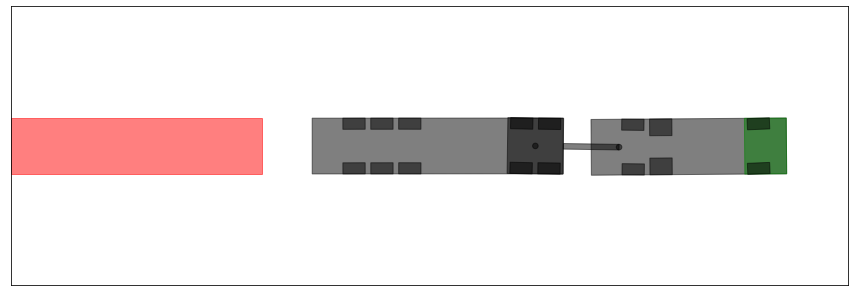

Visualisation...


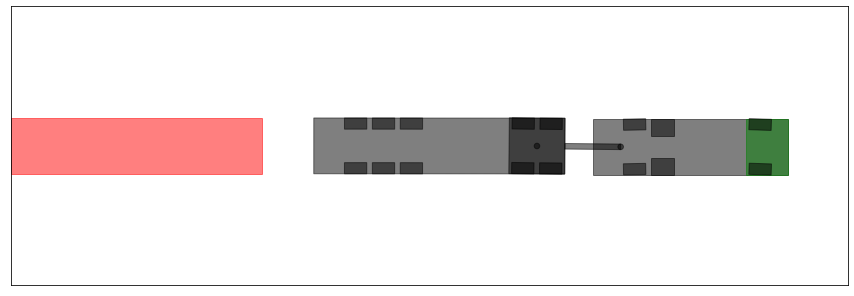

Visualisation...


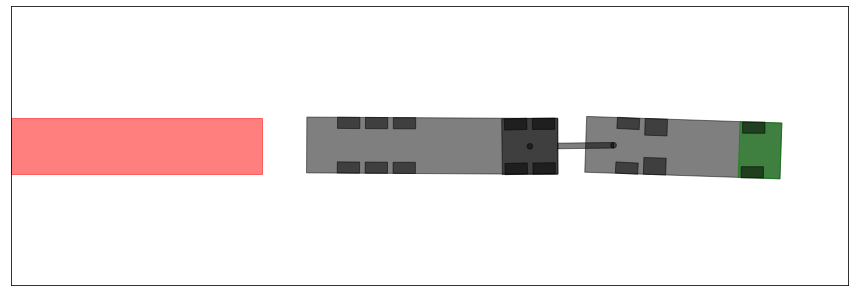

Visualisation...


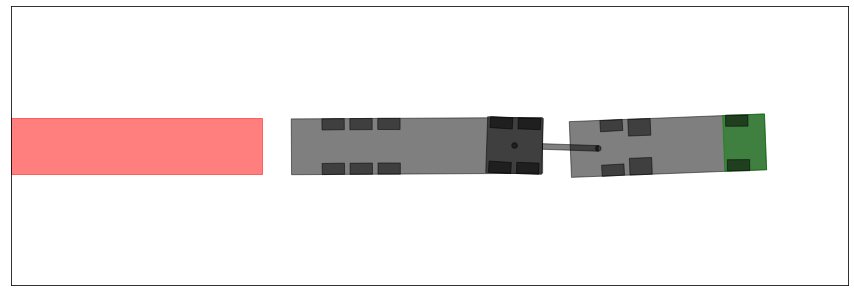

Visualisation...


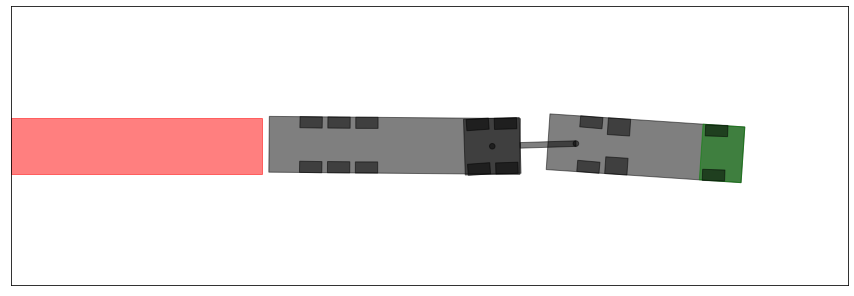

Visualisation...


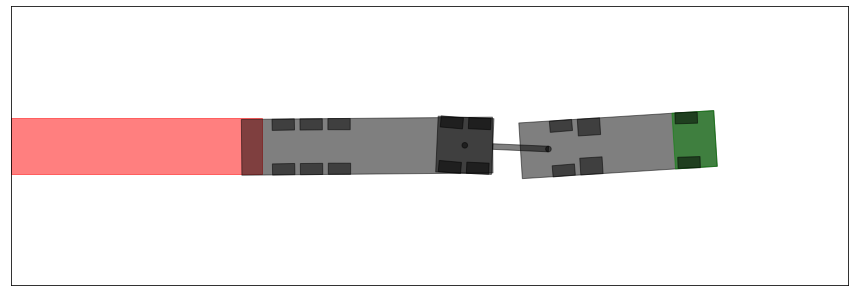

Visualisation...


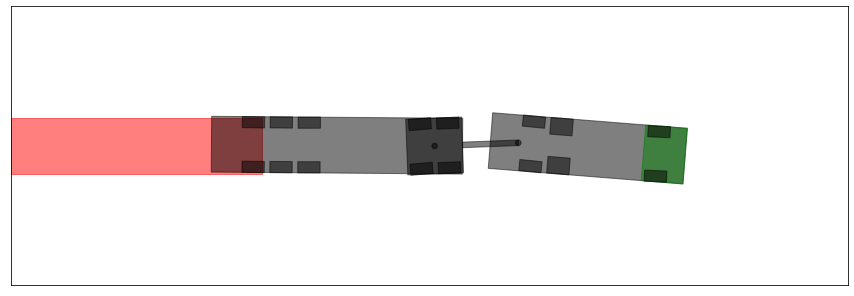

Visualisation...


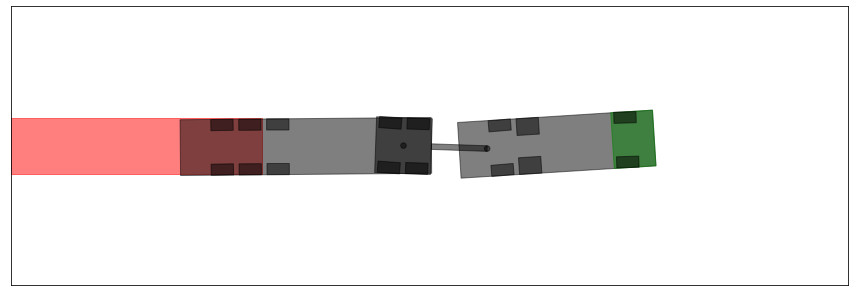

Visualisation...


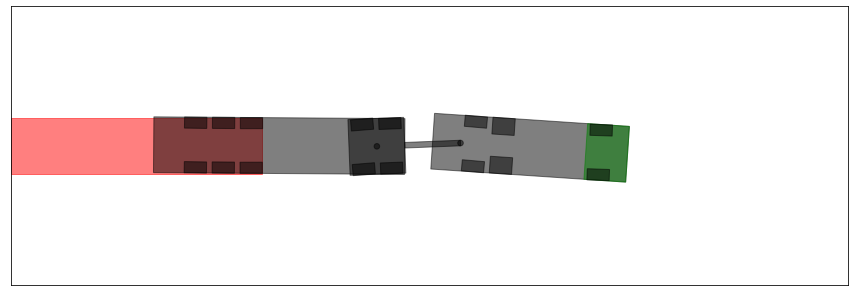

Visualisation...


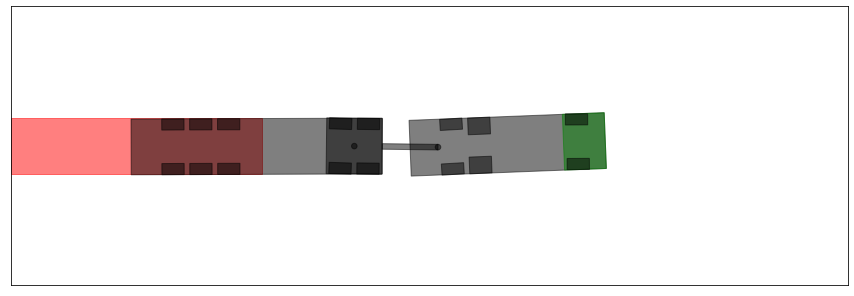

Visualisation...


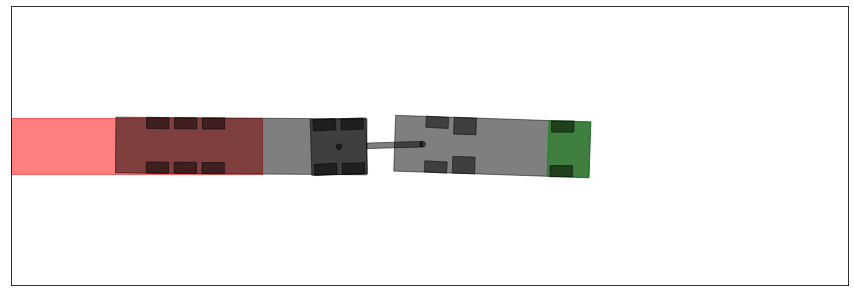

Visualisation...


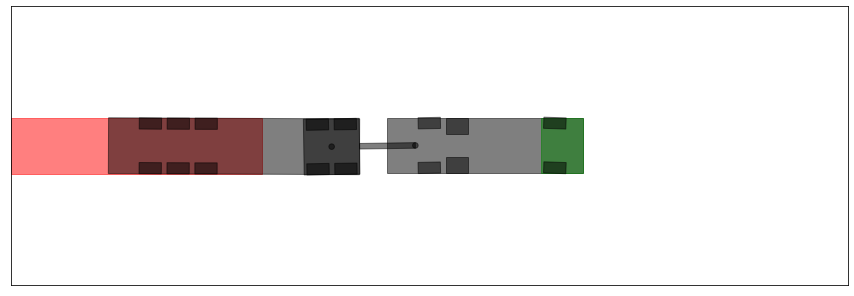

Visualisation...


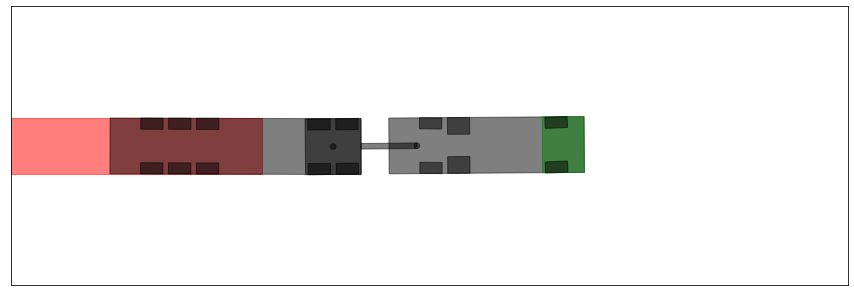

Visualisation...


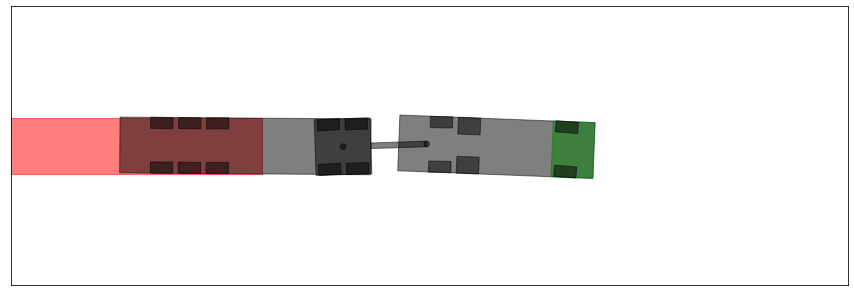

Visualisation...


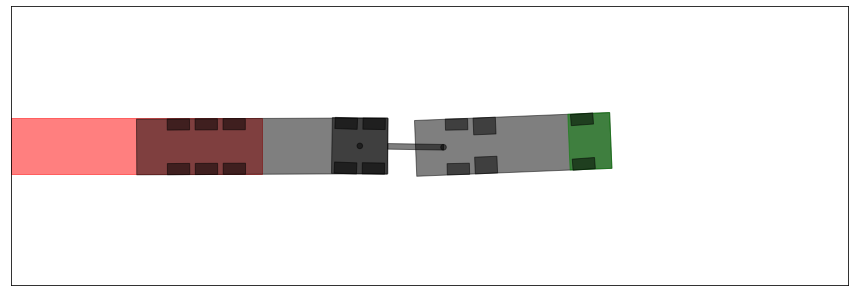

Visualisation...


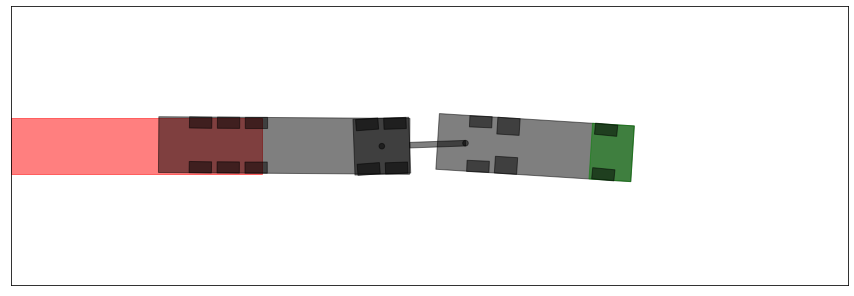

Visualisation...


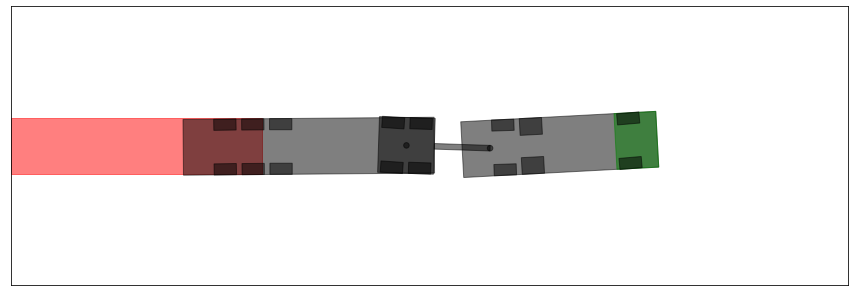

Visualisation...


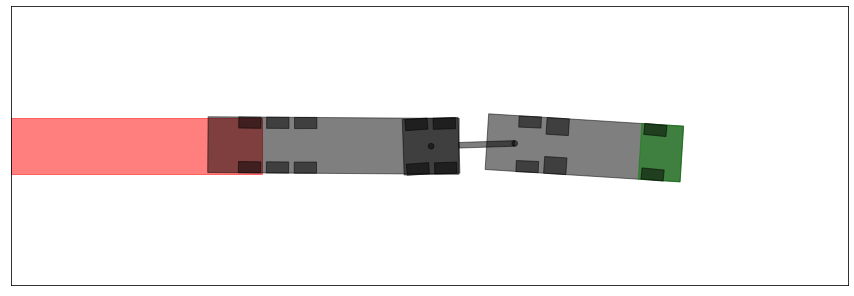

Visualisation...


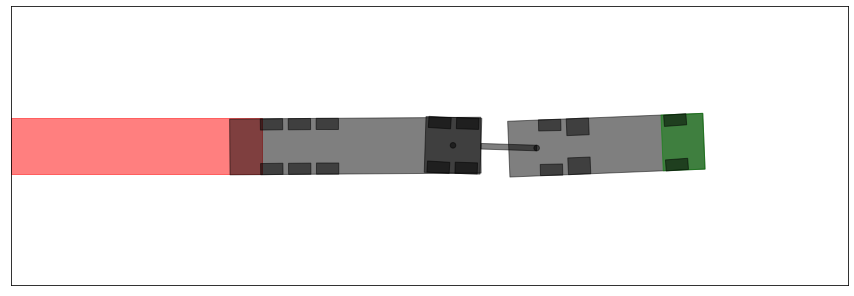

Visualisation...


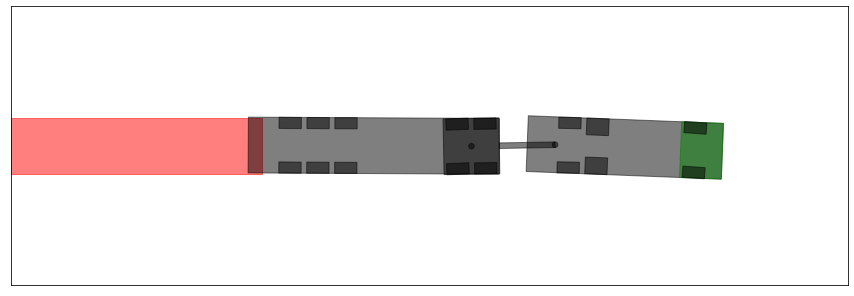

Visualisation...


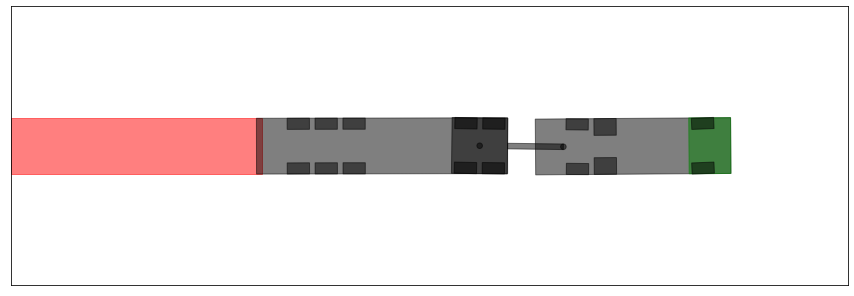

Visualisation...


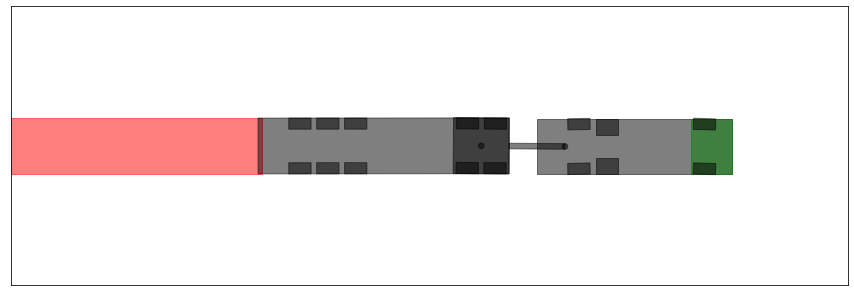

Visualisation...


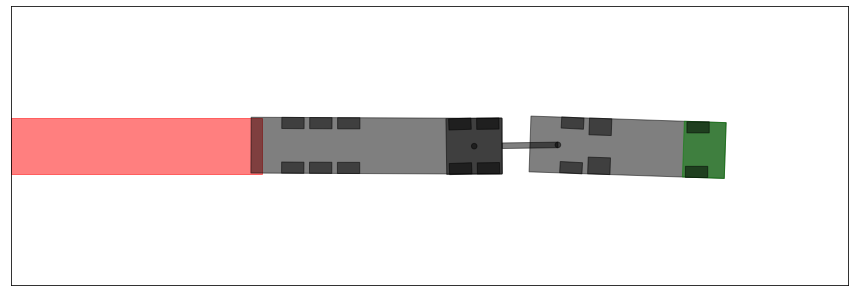

Visualisation...


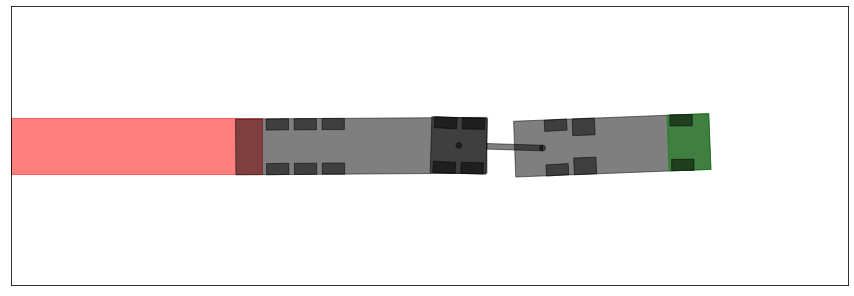

Visualisation...


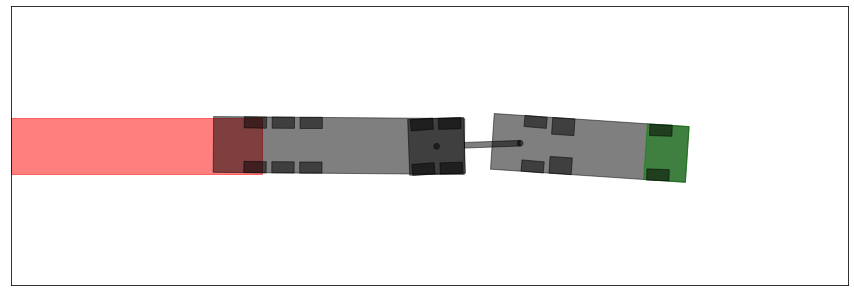

Visualisation...


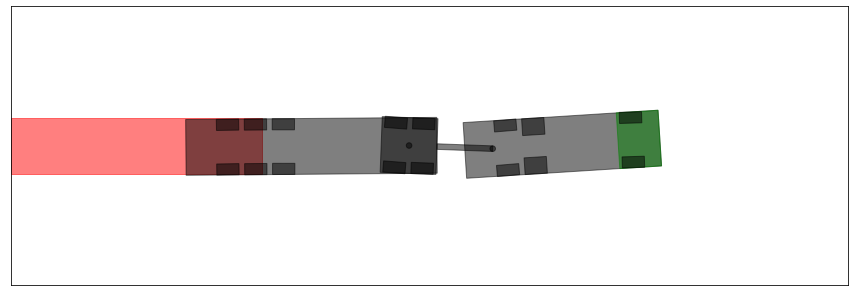

Visualisation...


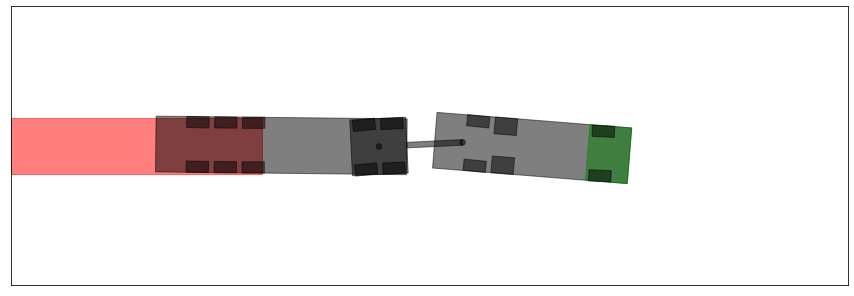

Visualisation...


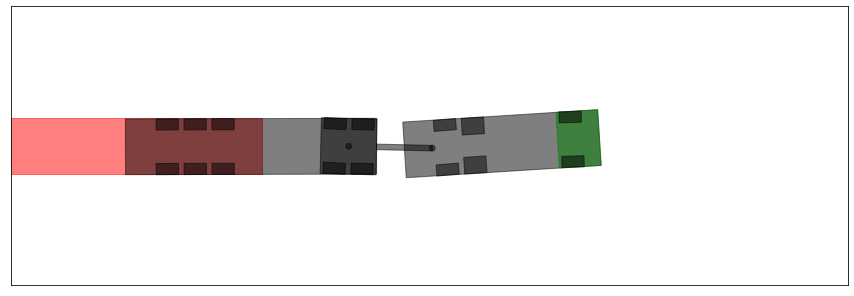

Visualisation...


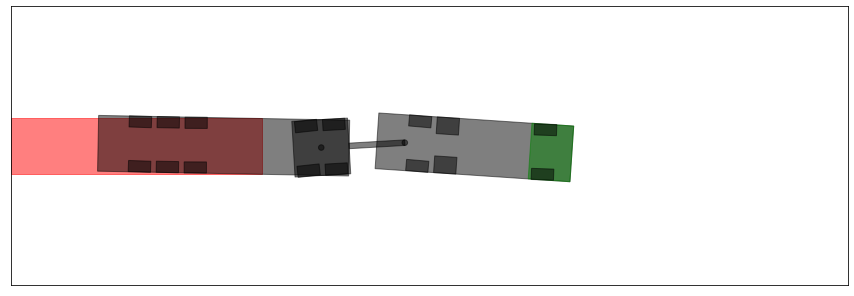

Visualisation...


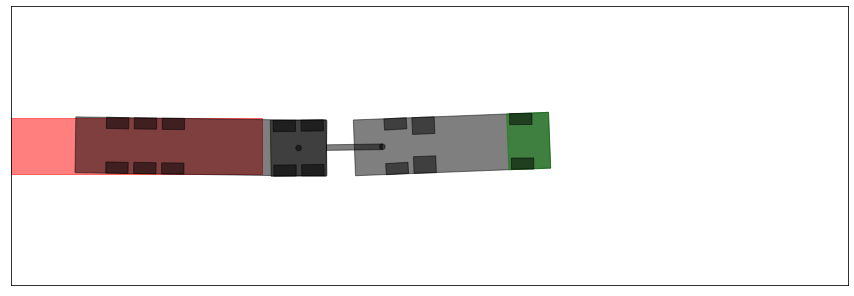

Visualisation...


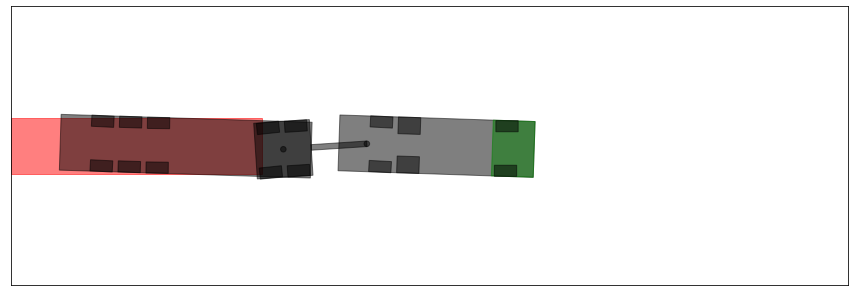

Visualisation...


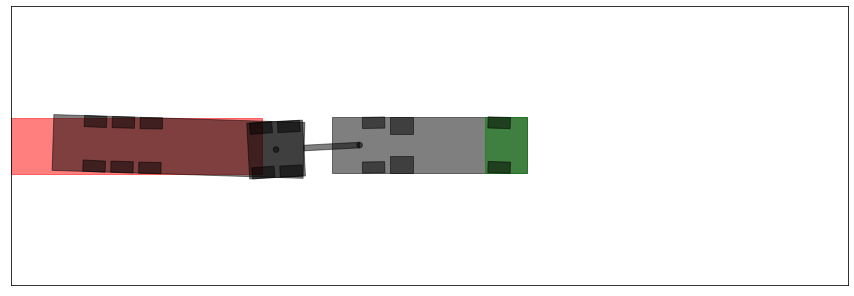

Visualisation...


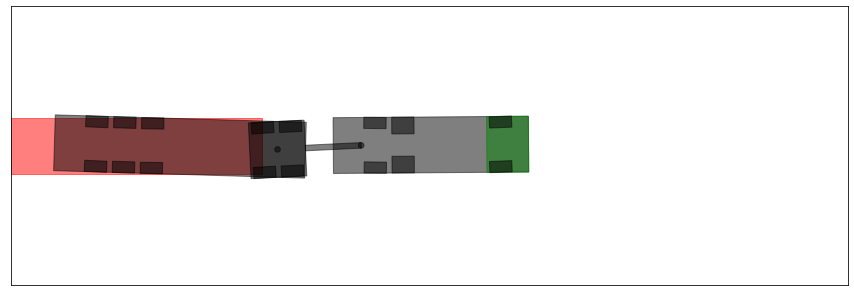

Visualisation...


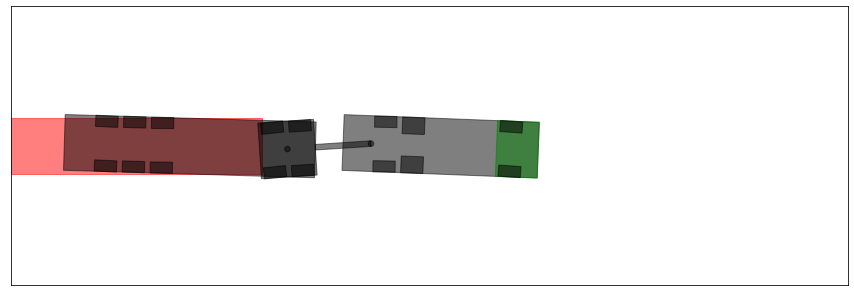

Visualisation...


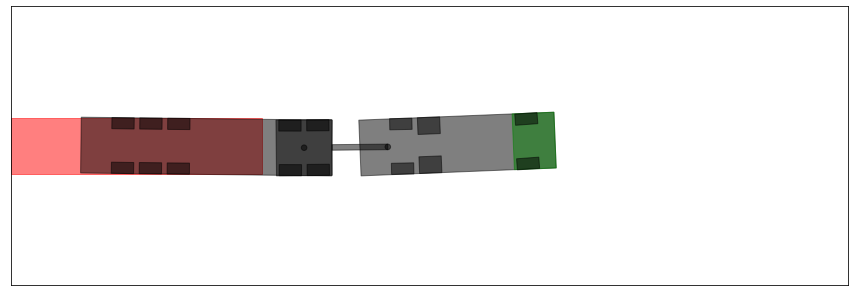

Visualisation...


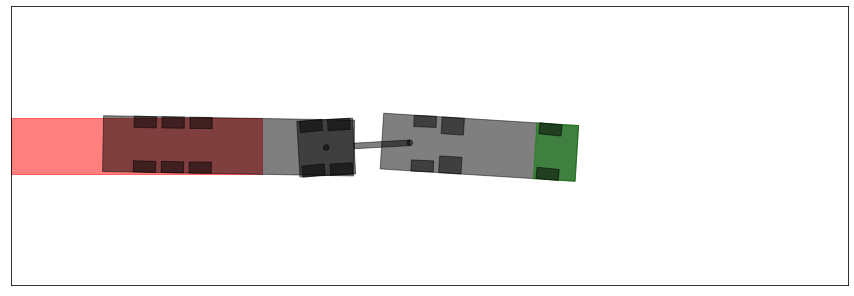

Visualisation...


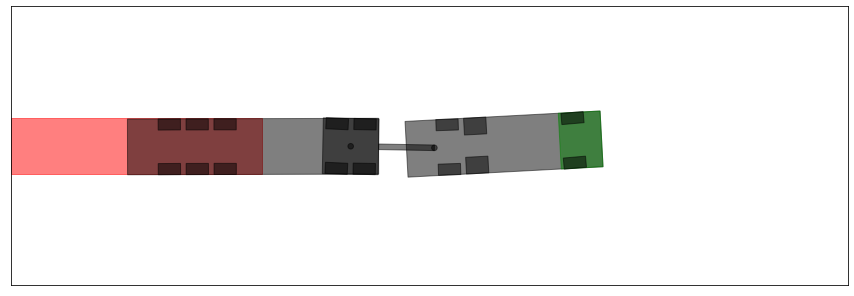

Visualisation...


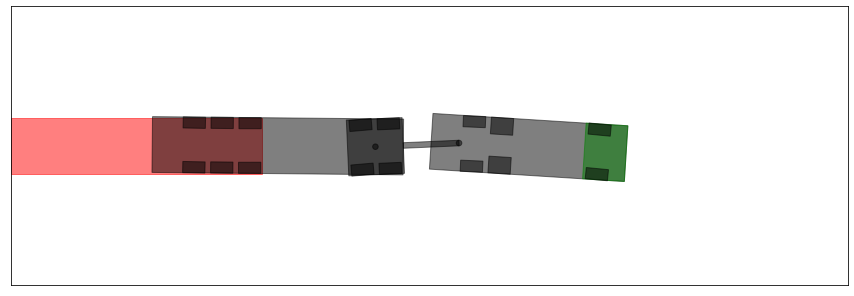

Visualisation...


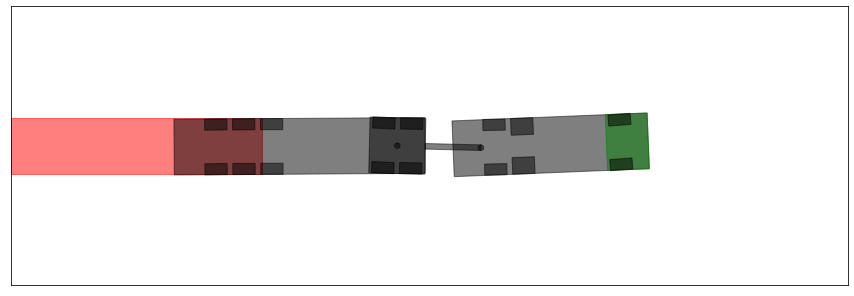

Visualisation...


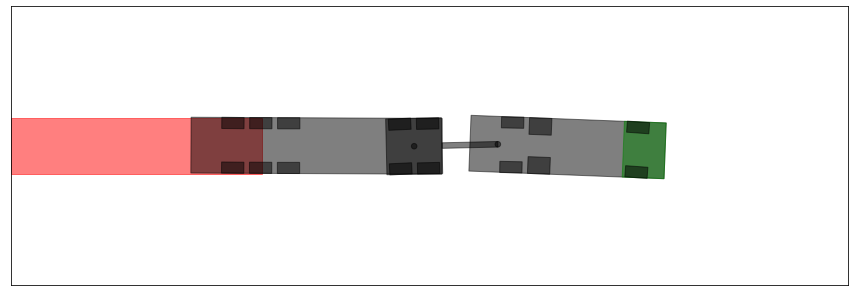

Visualisation...


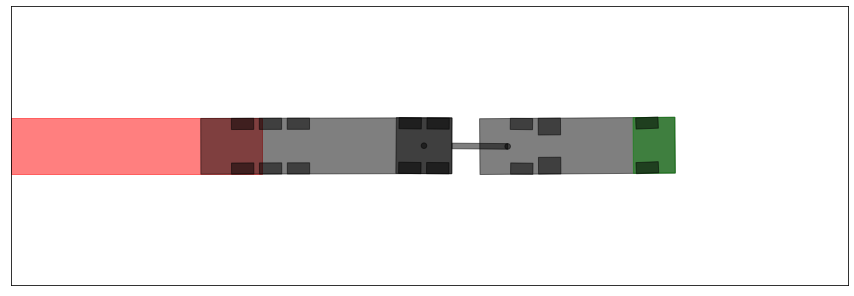

Visualisation...


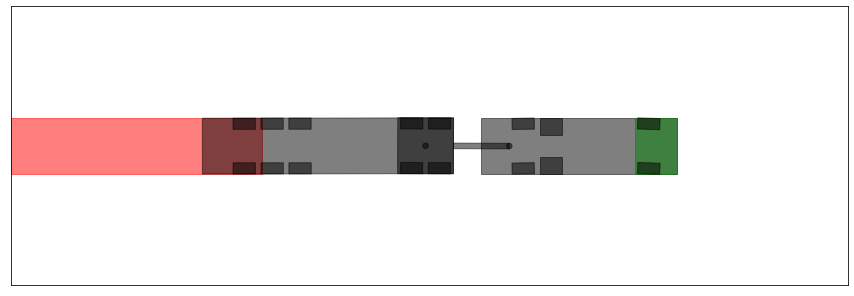

Visualisation...


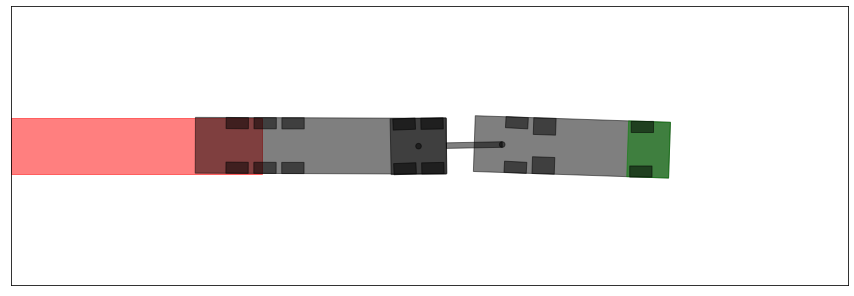

Visualisation...


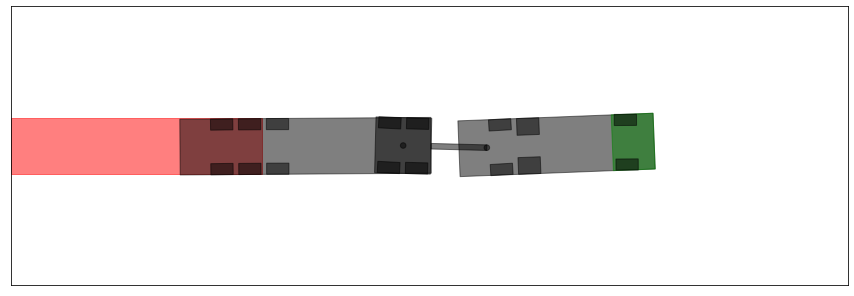

Visualisation...


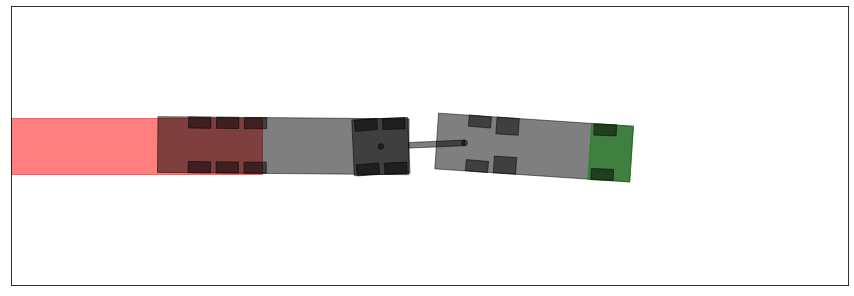

Visualisation...


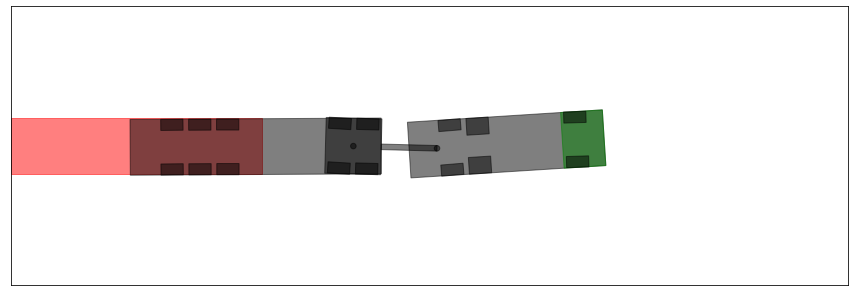

Visualisation...


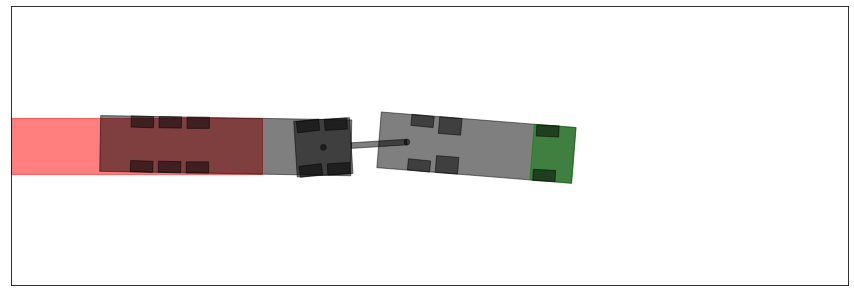

Visualisation...


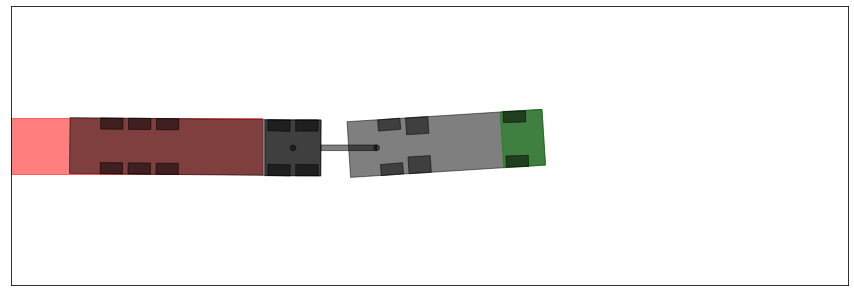

Visualisation...


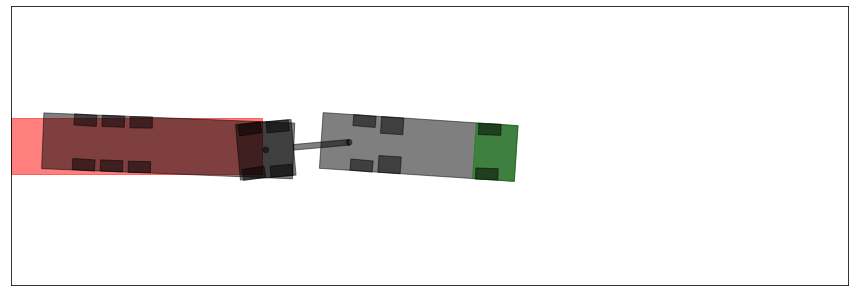

Visualisation...


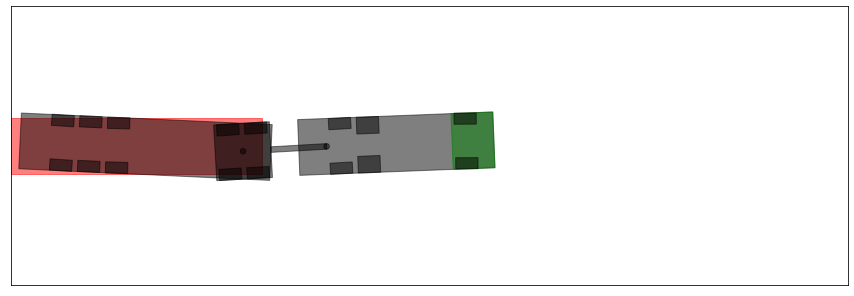

Visualisation...


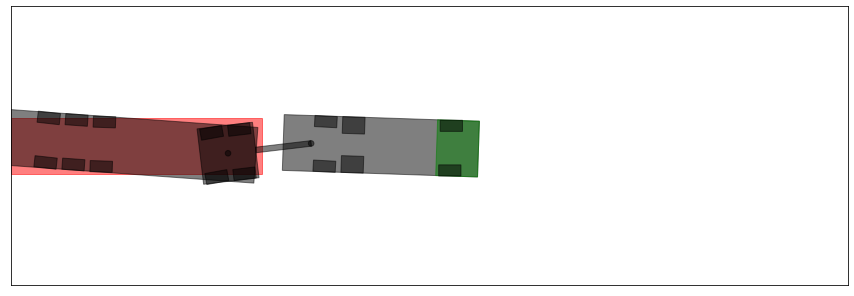

Visualisation...


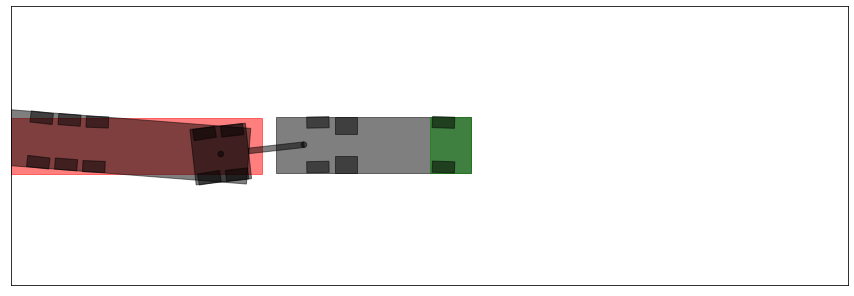

Visualisation...


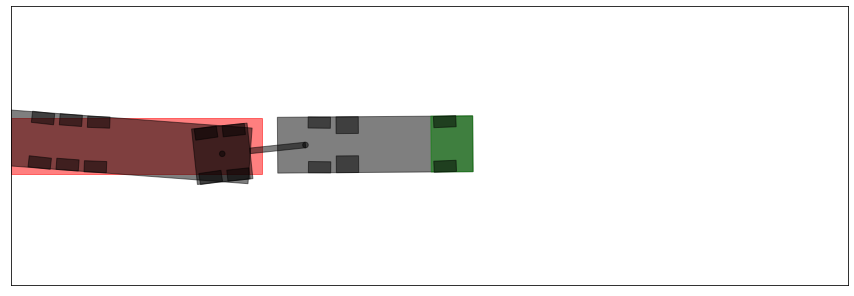

Visualisation...


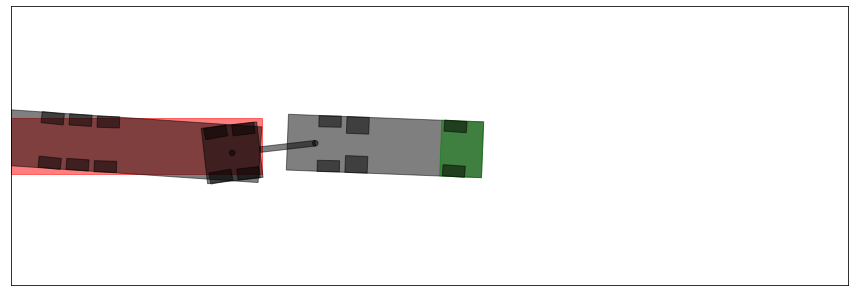

Visualisation...


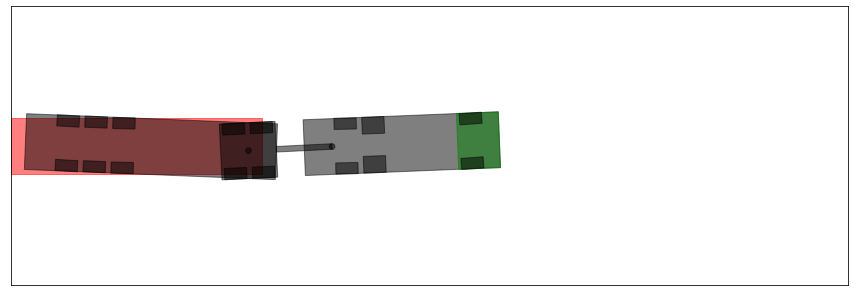

Visualisation...


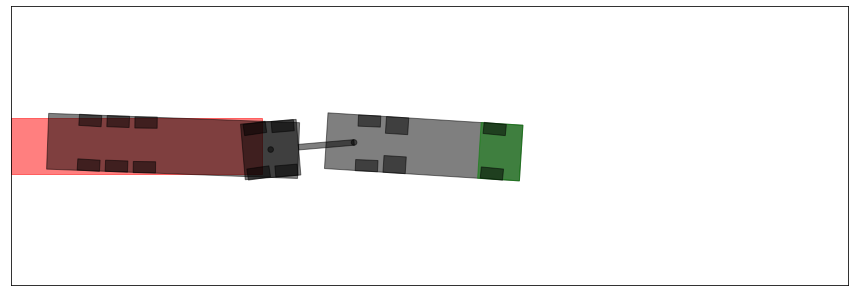

Visualisation...


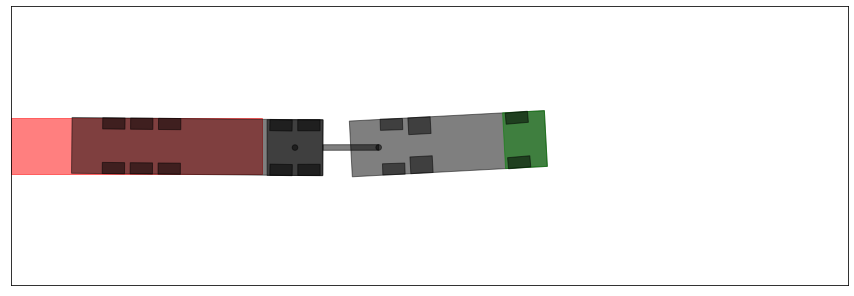

Visualisation...


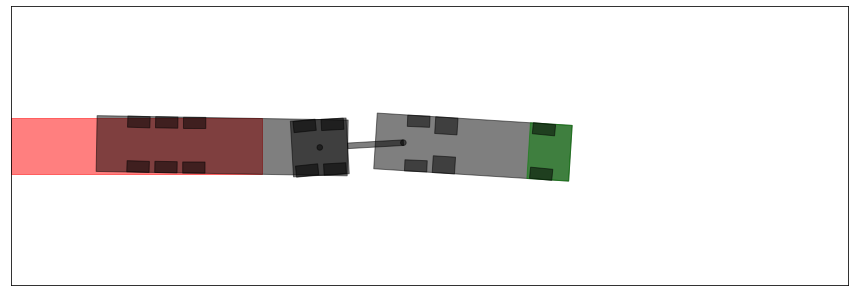

Visualisation...


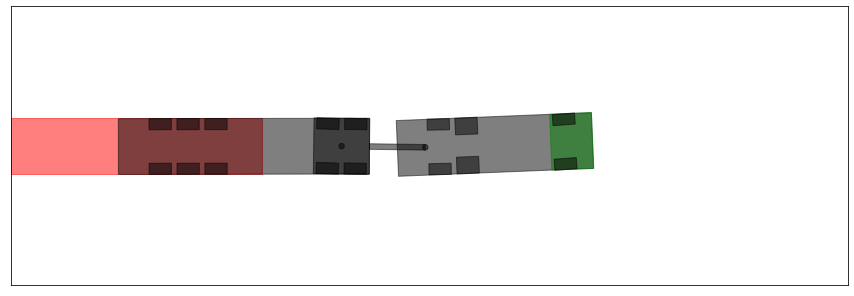

Visualisation...


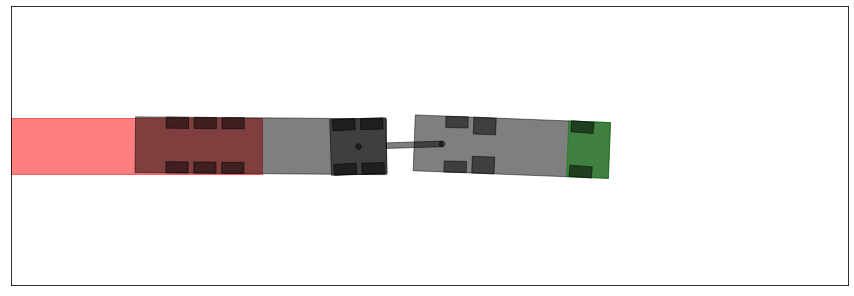

Visualisation...


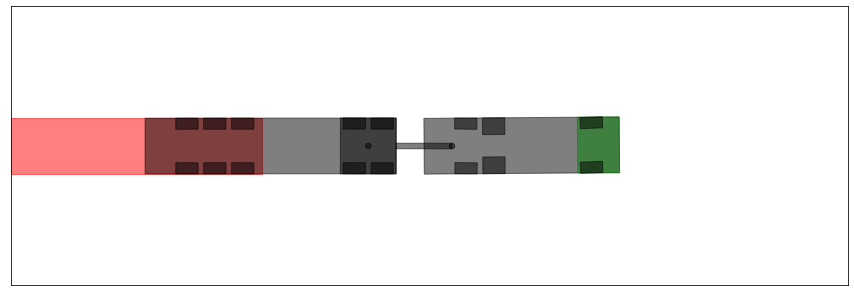

Visualisation...


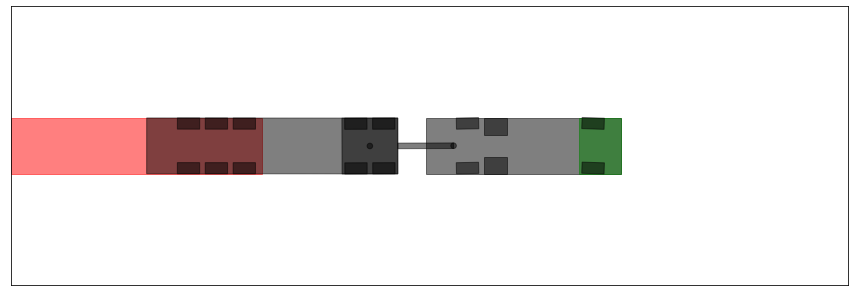

Visualisation...


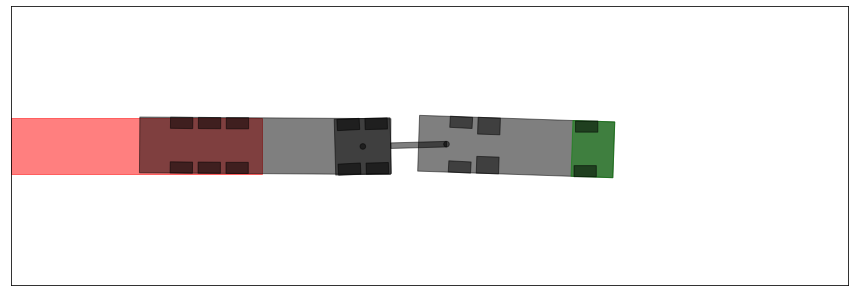

Visualisation...


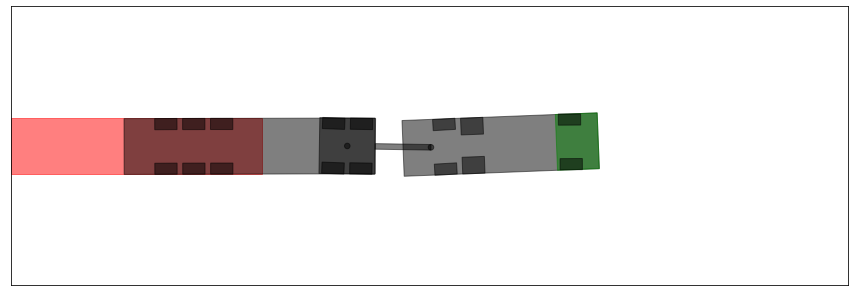

Visualisation...


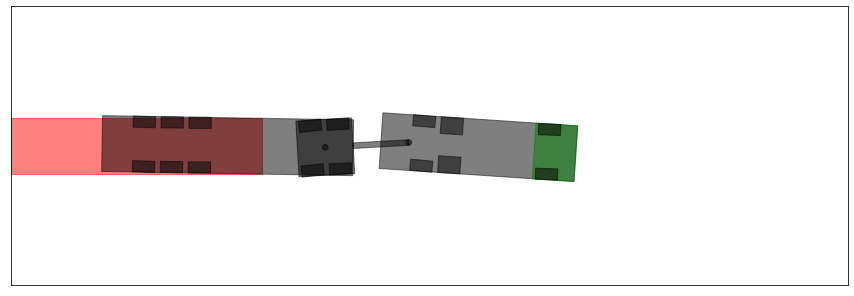

Visualisation...


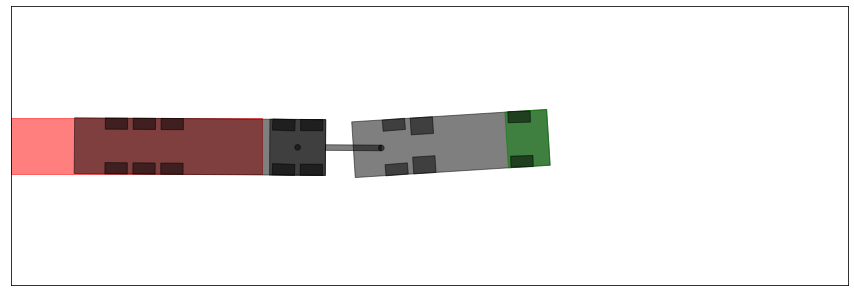

Visualisation...


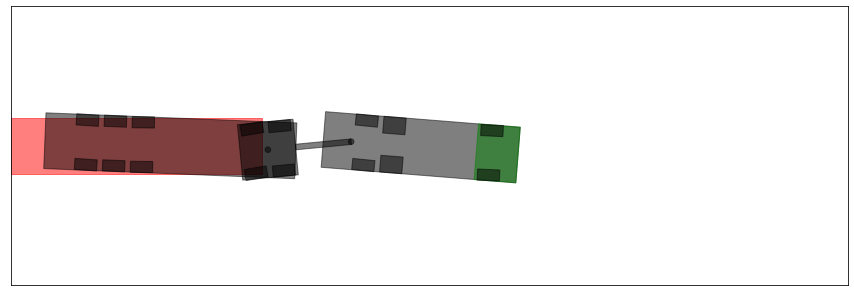

Visualisation...


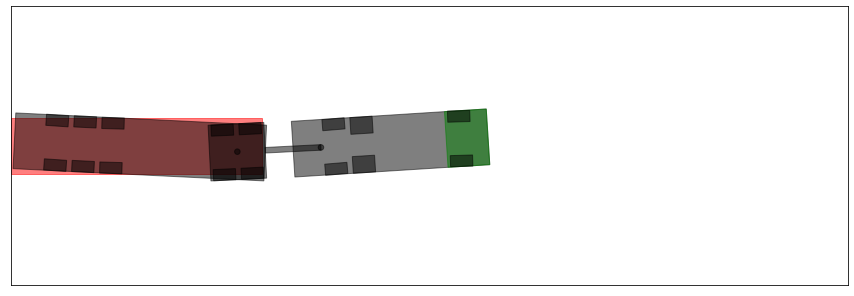

Visualisation...


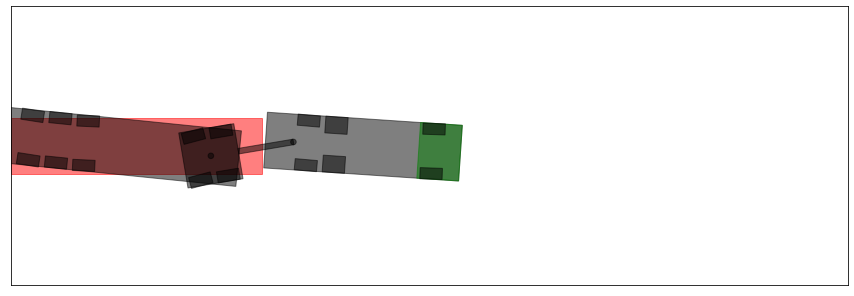

Visualisation...


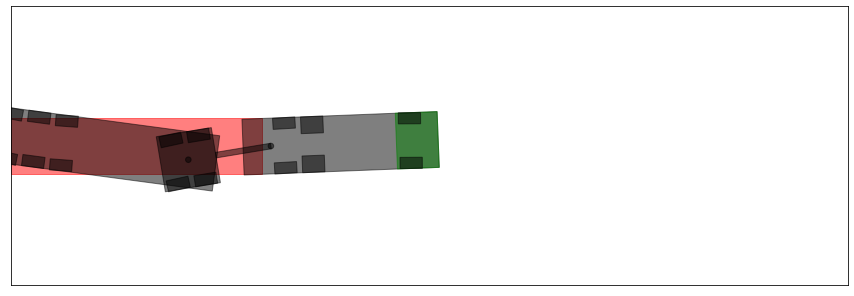

Visualisation...


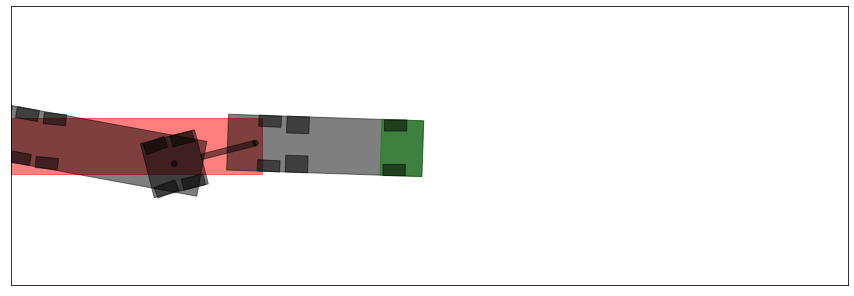

Visualisation...


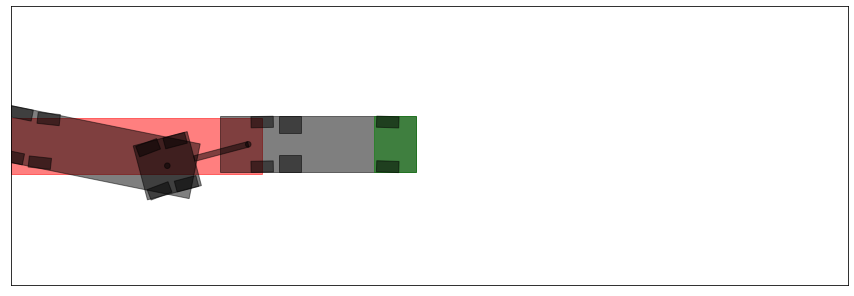

Visualisation...


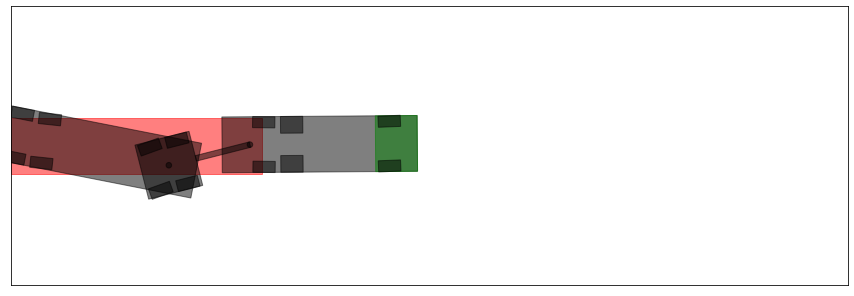

Visualisation...


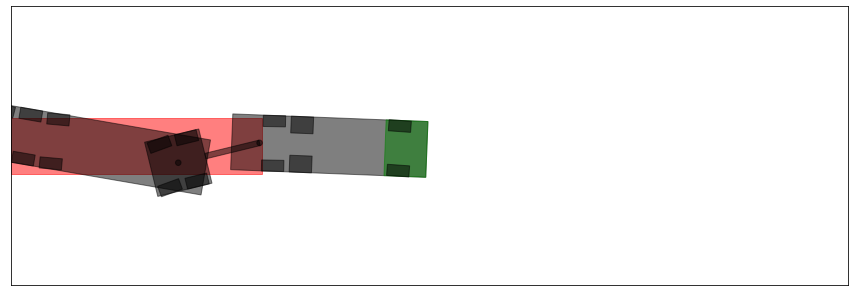

Visualisation...


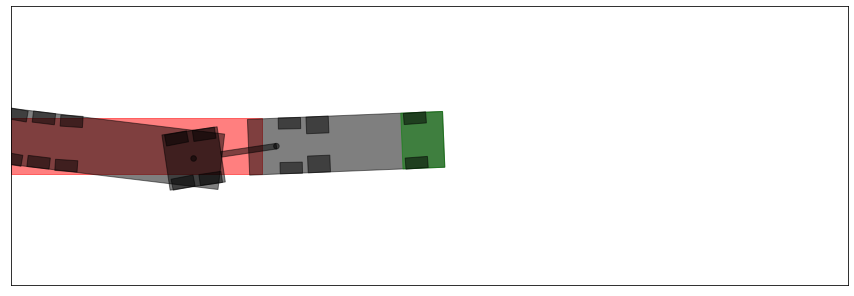

Visualisation...


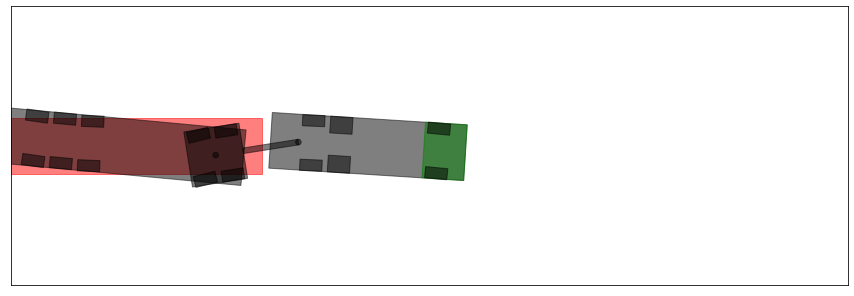

Visualisation...


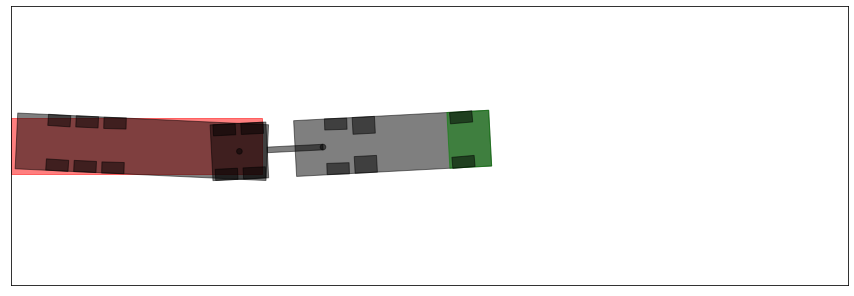

Visualisation...


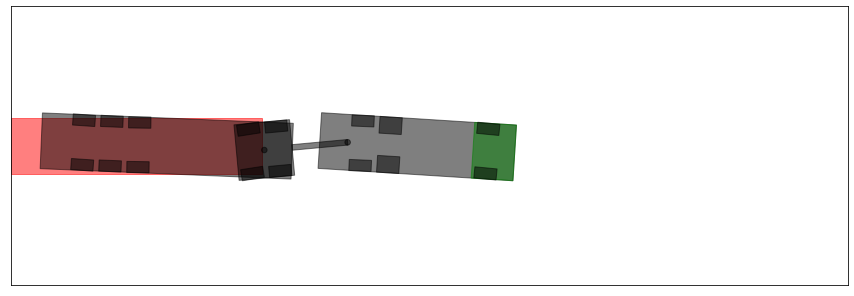

Visualisation...


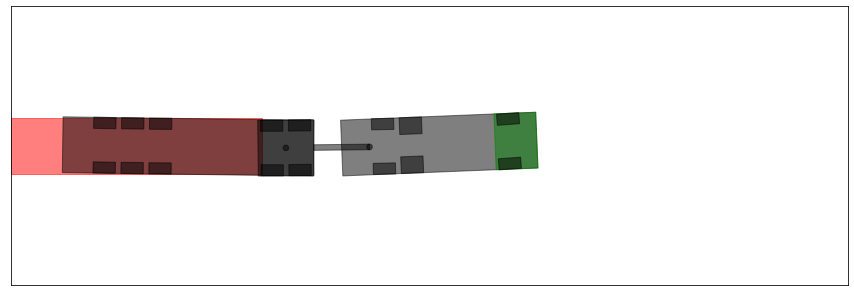

Visualisation...


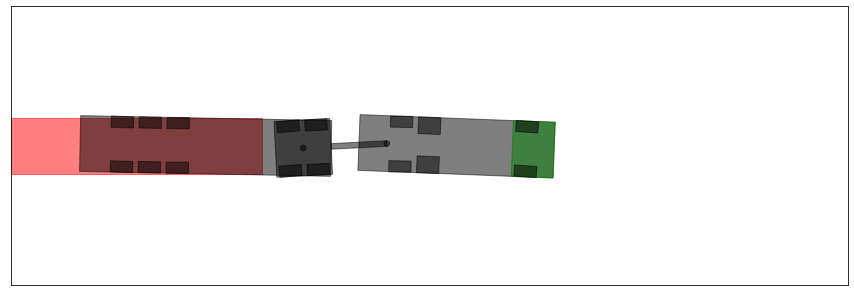

Visualisation...


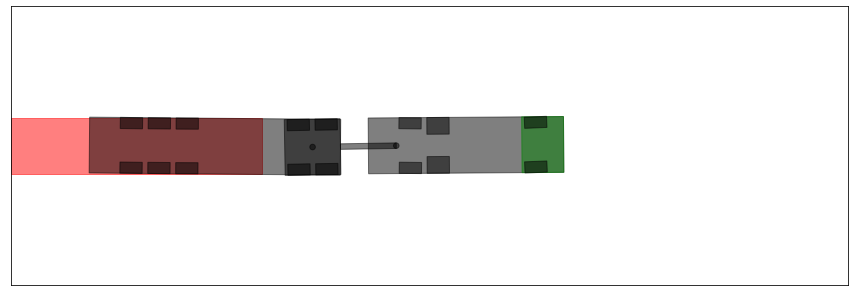

Visualisation...


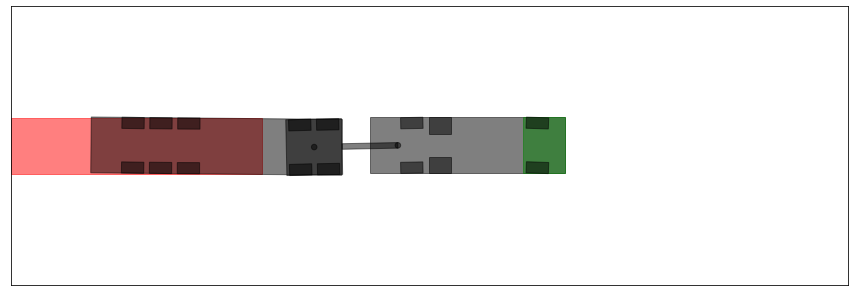

Visualisation...


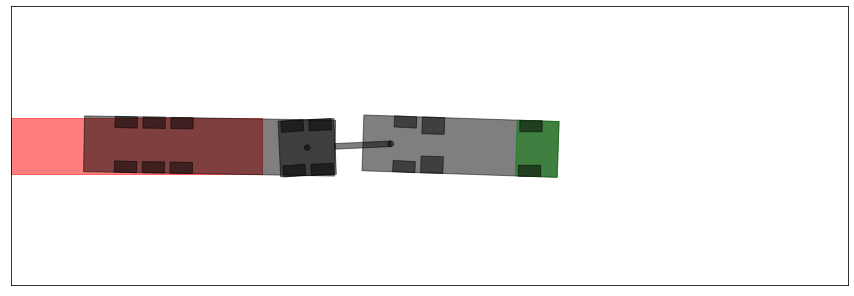

Visualisation...


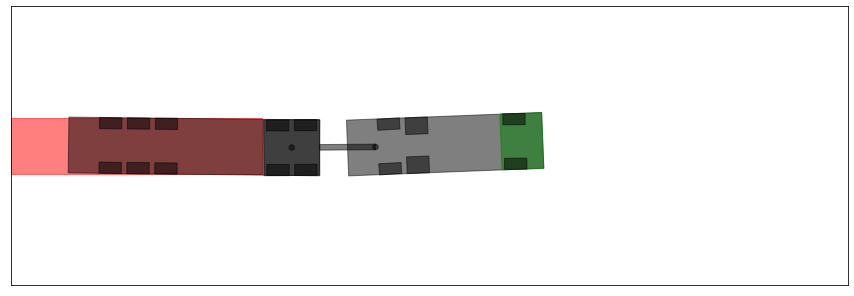

Visualisation...


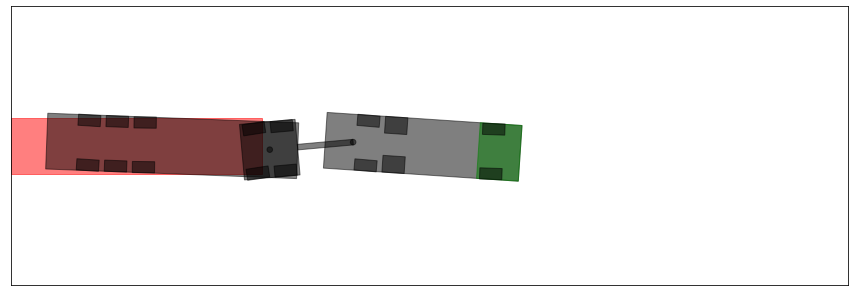

Visualisation...


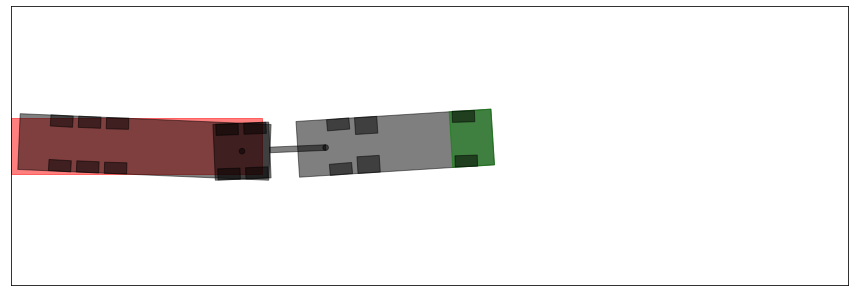

Visualisation...


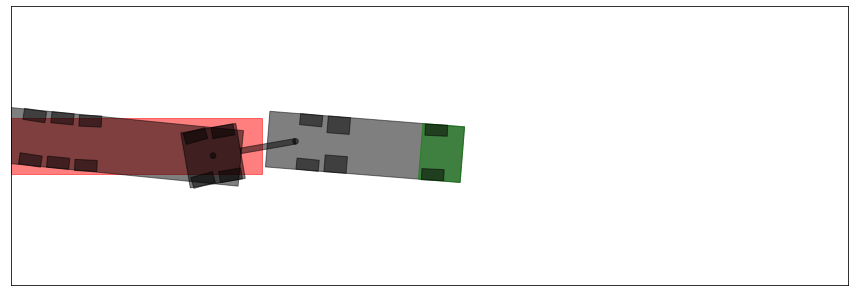

Visualisation...


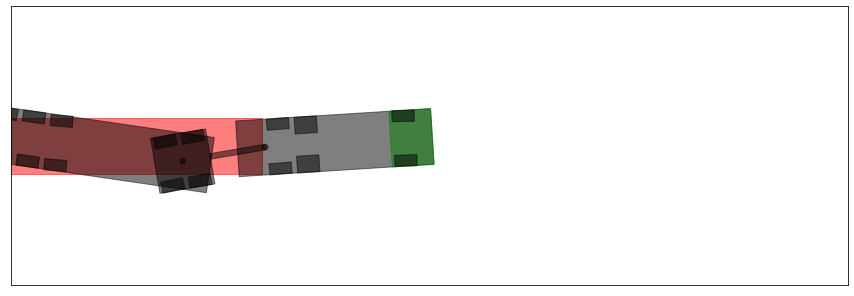

Visualisation...


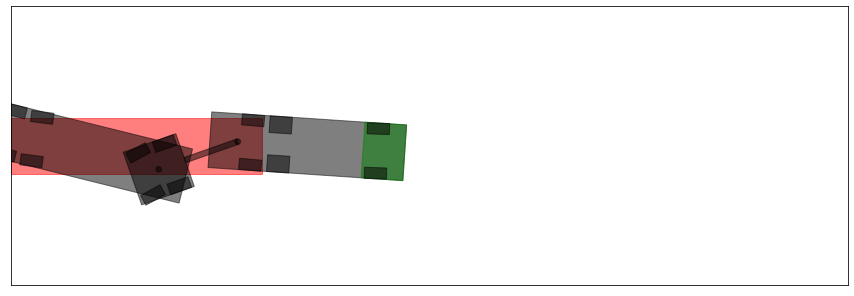

Visualisation...


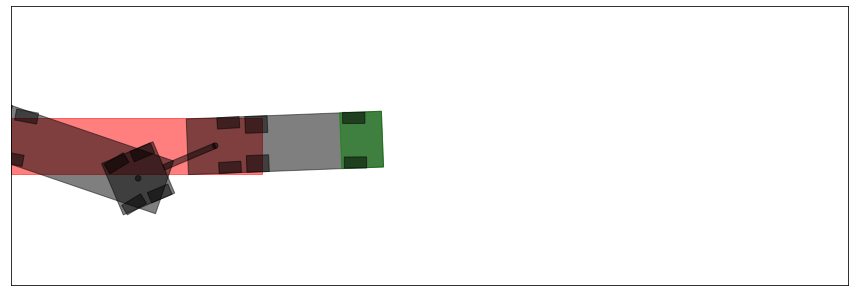

Visualisation...


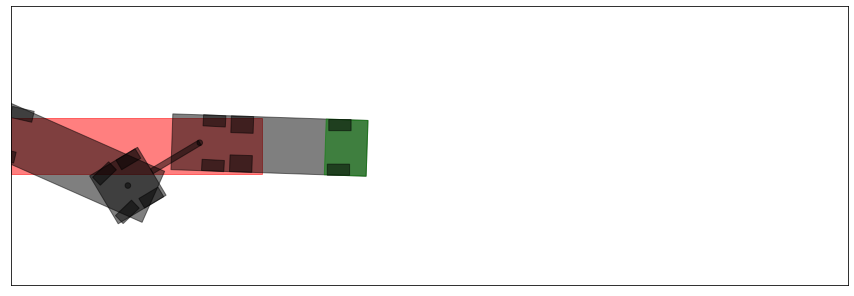

Visualisation...


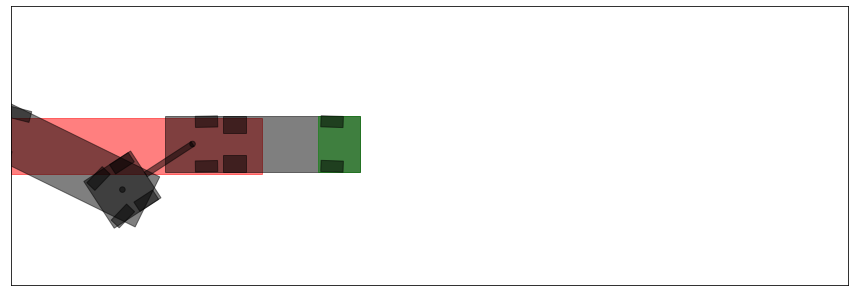

Visualisation...


In [26]:
#!/usr/bin/env python

###############
# Main method #
###############

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

from numpy import array
from multiprocessing import Process, Queue

destination_translation = array([4.5,5])
destination_rotation = 180

simulate_combination = Simulate_combination(destination_translation,destination_rotation)    
        
def visualize(visualisation_queue):
    while True:
        print('Visualisation...')
        visualisation_element = visualisation_queue.get()
        if (visualisation_element == 'DONE'):
            break
        visualize_combination(visualisation_element)
                
def main():
    visualisation_queue = Queue()
    visualisation_process = Process(target=visualize, args=((visualisation_queue),))
    visualisation_process.daemon = True
    visualisation_process.start()
    
    for step_number in range(np.int(1e4)):
        velocity = -0.1+np.sin(step_number/1e3*np.pi)
        steering_percentage = np.sin(step_number/1e2*np.pi)
            
        truck_translation,\
        truck_rotation,\
        first_trailer_rotation,\
        second_trailer_rotation,\
        visualisation_queue = simulate_combination.run(velocity,steering_percentage,visualisation_queue)
        
    visualisation_queue.put('DONE')    
    visualisation_process.join()
    
if __name__=='__main__':
    main()